In [15]:
# import the libraries 
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_37804/765904632.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [14]:
# read csv file 
df = pd.read_csv('prices.csv')
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Price
0,2017-02-21,55.478001
1,2017-02-22,54.702000
2,2017-02-23,51.198002
3,2017-02-24,51.400002
4,2017-02-27,49.245998
...,...,...
1254,2022-02-11,860.000000
1255,2022-02-14,875.760010
1256,2022-02-15,922.429993
1257,2022-02-16,923.390015


In [11]:
df.max()

Date     2022-02-17 00:00:00
Price            1229.910034
dtype: object

In [12]:
df.min()

Date     2017-02-21 00:00:00
Price              35.793999
dtype: object

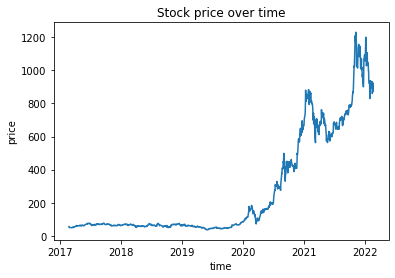

In [17]:
plt.plot(df["Date"], df["Price"])
plt.title("Stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [18]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Price'].values
test_data = test_data['Price'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 877.2040338641867


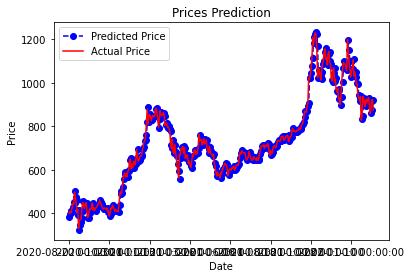

In [19]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()